## Análise de Dados com Python 📊

Este notebook apresenta uma análise completa de um dataset de vendas, incluindo importação, tratamento, análise estatística e visualização de dados.

Transformação do arquivo JSON em arquivo CSV

In [3]:
import pandas as pd
import json

# Carregar o dataset de vendas
file_path = "vendas.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Criar um DataFrame
df = pd.DataFrame(data)

# Salvar o DataFrame tratado em um arquivo CSV para uso no notebook
csv_path = "vendas.csv"
df.to_csv(csv_path, index=False, encoding='utf-8')

csv_path

'vendas.csv'

 Importação das Bibliotecas Essenciais 📦

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Carregamento e Visualização Inicial dos Dados 🗄️

In [6]:
df = pd.read_csv('vendas.csv')
df.head()  # Exibir as primeiras linhas do dataset

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Modelagem preditiva,livros,92.45,5.609697,01/01/2020,Thiago Silva,BA,1,cartao_credito,3,-13.29,-41.71
1,Iniciando em programação,livros,43.84,0.000000,01/01/2020,Mariana Ferreira,SP,5,cartao_credito,1,-22.19,-48.79
2,Pandeiro,instrumentos musicais,87.18,2.226512,01/01/2020,Thiago Silva,RJ,4,cartao_credito,4,-22.25,-42.66
3,Corda de pular,esporte e lazer,13.65,1.257926,01/01/2020,Camila Ribeiro,RJ,4,boleto,1,-22.25,-42.66
4,Dinossauro Rex,brinquedos,28.32,2.039059,01/01/2020,Juliana Costa,RJ,1,cartao_debito,1,-22.25,-42.66


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


Tratamento e Limpeza de Dados 🧹

In [7]:
#Verificando informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [8]:
#Verificando valores nulos
df.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

In [9]:
#Removendo duplicatas
df = df.drop_duplicates()
df.shape

(9435, 12)

In [12]:
#Convertendo "Data da Compra" para o formato de data
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 9435 non-null   object        
 1   Categoria do Produto    9435 non-null   object        
 2   Preço                   9435 non-null   float64       
 3   Frete                   9435 non-null   float64       
 4   Data da Compra          9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Local da compra         9435 non-null   object        
 7   Avaliação da compra     9435 non-null   int64         
 8   Tipo de pagamento       9435 non-null   object        
 9   Quantidade de parcelas  9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

Análise Estatística 📊

In [14]:
df.describe()

,Preço,Frete,Data da Compra,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,2021-08-16 07:36:48.076311552,4.014520,2.927398,-20.534059,-47.171176
min,10.070000,0.000000,2020-01-01 00:00:00,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,2020-10-27 00:00:00,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,2021-08-22 00:00:00,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,2022-06-04 12:00:00,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,2023-03-31 00:00:00,5.000000,24.000000,1.990000,-36.590000
std,787.094508,41.973711,NaN,1.390518,2.802776,5.399153,4.177887


Visualização de Dados 📉

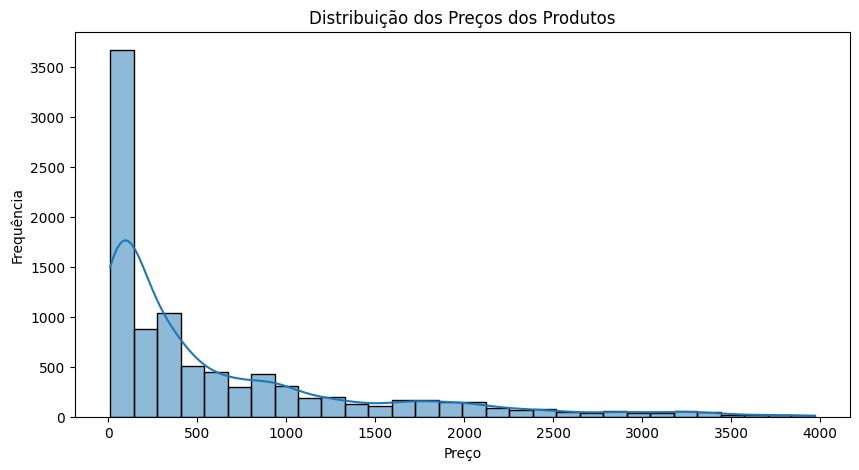

In [15]:
#Distribuição dos preços dos produtos
plt.figure(figsize=(10,5))
sns.histplot(df['Preço'], bins=30, kde=True)
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


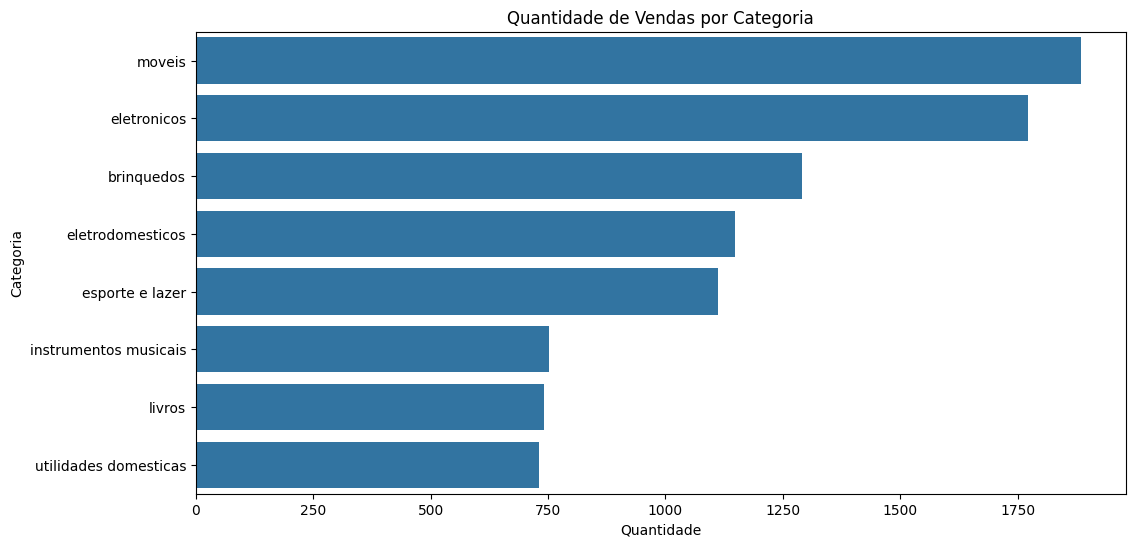

In [16]:
#Quantidade de vendas por categoria
plt.figure(figsize=(12,6))
sns.countplot(y=df['Categoria do Produto'], order=df['Categoria do Produto'].value_counts().index)
plt.title('Quantidade de Vendas por Categoria')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.show()


Exportação do Dataset Tratado para CSV 💾

In [17]:
df.to_csv('vendas_tratadas.csv', index=False, encoding='utf-8')
print('Arquivo CSV exportado com sucesso!')

Arquivo CSV exportado com sucesso!
